In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from copy import deepcopy
import pickle as pkl
from tqdm import tqdm

from sim_cosmology import p, load_dataloader_and_pretrained_model
p.data_path = '../../src/dsets/cosmology/data'
p.model_path = '../../src/dsets/cosmology/data'
# adaptive-wavelets modules
from losses import get_loss_f
from train import Trainer
from evaluate import Validator
from transform2d import DWT2d
from utils import get_1dfilts, get_2dfilts, get_wavefun
from wave_attributions import Attributer
from visualize import cshow, plot_1dfilts, plot_2dfilts, plot_2dreconstruct, plot_wavefun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pywt
t = np.arange(0,4*np.pi,0.1)   # start,stop,step
x = np.sin(t)
haar = pywt.Wavelet('haar')
a1 = pywt.wavedec(x, haar, level=1)[0]/np.sqrt(2)
a2 = pywt.wavedec(x, haar, level=2)[0]/2
a3 = pywt.wavedec(x, haar, level=3)[0]/(2*np.sqrt(2))

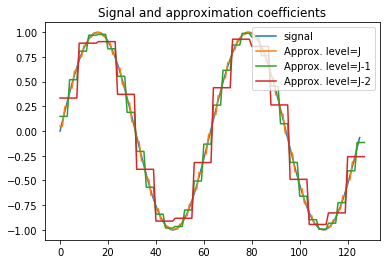

In [7]:
plt.plot(x, label='signal')
plt.title('Signal and approximation coefficients')
plt.plot(np.repeat(a1,2), label='Approx. level=J')
plt.plot(np.repeat(a2,4), label='Approx. level=J-1')
plt.plot(np.repeat(a3,8), label='Approx. level=J-2')
plt.legend(loc='upper right')

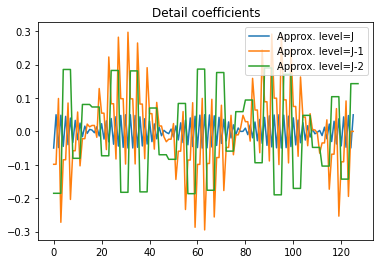

In [8]:
plt.title('Detail coefficients')
plt.plot(x-np.repeat(a1,2), label='Approx. level=J')
plt.plot(np.repeat(a1,2)-np.repeat(a2,4)[1:-1], label='Approx. level=J-1')
plt.plot(np.repeat(a2,4)-np.repeat(a3,8), label='Approx. level=J-2')
plt.legend(loc='upper right')

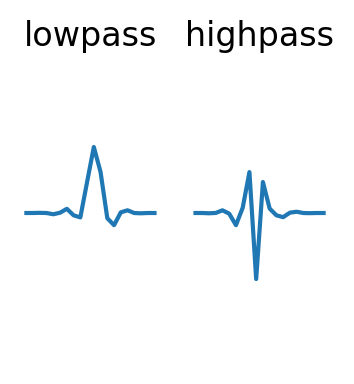

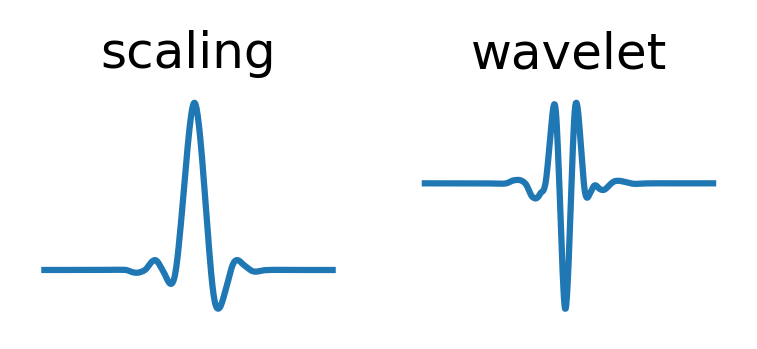

In [24]:
wt = DWT2d(wave='sym8', mode='zero', J=4, init_factor=1, noise_factor=0).to(device)
phi, psi, x = get_wavefun(wt)
filt = get_2dfilts(wt)
plot_1dfilts(filt[0], is_title=True, figsize=(2,2))
plot_wavefun((phi, psi, x), is_title=True, figsize=(3,1))